# Data Analysis

In [22]:
import pandas as pd
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

PROJECT_ROOT = pathlib.Path().parent.parent
DATA_FOLDER = PROJECT_ROOT.joinpath('data')
KAGGLE_CLEANED = DATA_FOLDER.joinpath('kaggle_cleaned.csv')

kaggle_df = pd.read_csv(KAGGLE_CLEANED)

## Spliting data

In [51]:
from sklearn.model_selection import train_test_split

features = kaggle_df.columns[kaggle_df.columns != 'price']
X = kaggle_df[features]
y = kaggle_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size: ', len(X_train), 'Test size: ', len(y_test))

Train size:  433 Test size:  109


## Linear Regression

In [52]:
""" Normal Split
This will split the data
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_train_pred = lr_model.predict(X_train)

print("Results for linear regression on training data")
print(' Default settings')
print('Internal Parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_train,y_train))
print()
print('Results for linear regression on train data')
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_lr_train_pred)))
print('RSE is ', mean_squared_error(y_train, y_lr_train_pred))
print('R^2 ', r2_score(y_train, y_lr_train_pred))

y_lr_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_lr_test_pred)))
print('RSE is ', mean_squared_error(y_test, y_lr_test_pred))
print('R^2 ', r2_score(y_test, y_lr_test_pred))

Results for linear regression on training data
 Default settings
Internal Parameters:
 Bias is  237206.20674365386
 Coefficients [ 3.07552160e+02  1.12465376e+05  1.02904399e+06  6.40034493e+05
  3.21626815e+05 -3.79562161e+05  3.79562161e+05]
 Score 0.5922244248979526

Results for linear regression on train data
RMSE is  1136595.8387553697
RSE is  1291850100676.0225
R^2  0.5922244248979526

Results for linear regression on test data
RMSE is  1227494.4747191283
RSE is  1506742685465.9885
R^2  0.5245574573425862


Text(0, 0.5, 'Actual')

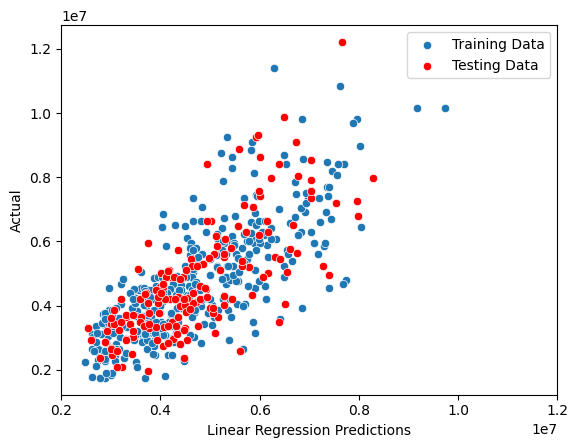

In [ ]:
sns.scatterplot(x=y_lr_train_pred, y=y_train)
sns.scatterplot(x=y_lr_test_pred, y=y_test, color='red')
plt.legend(['Training Data', 'Testing Data'])
plt.xticks([2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
plt.xlabel('Linear Regression Predictions')
plt.ylabel('Actual')

## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

# The degree number
power = 6
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X_train_poly = poly_process.fit_transform(X_train)
X_test_poly = poly_process.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_poly_train_pred = poly_model.predict(X_train_poly)

print("Results for linear regression on training data")
print(f' Power of {power}')
print('Internal Parameters:')
print(' Bias is ', poly_model.intercept_)
# print(' Coefficients', poly_model.coef_)
print(' Score', poly_model.score(X_train_poly,y_train))
print()
print('Results for linear regression on train data')
print('MAE is ', mean_absolute_error(y_train,y_poly_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_poly_train_pred)))
print('RSE is ', mean_squared_error(y_train, y_poly_train_pred))
print('R^2 ', r2_score(y_train, y_poly_train_pred))

y_poly_test_pred = poly_model.predict(X_test_poly)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test,y_poly_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_poly_test_pred)))
print('RSE is ', mean_squared_error(y_test, y_poly_test_pred))
print('R^2 ', r2_score(y_test, y_poly_test_pred))

Results for linear regression on training data
 Power of 6
Internal Parameters:
 Bias is  3421816.7003729744
 Score 0.5872455806676748

Results for linear regression on train data
MAE is  828563.5141765021
RMSE is  1143513.571290307
RSE is  1307623287725.1118
R^2  0.5872455806676748

Results for linear regression on test data
MAE is  1040454.9775848435
RMSE is  1527235.5856926602
RSE is  2332448534206.0024
R^2  0.26401151807981227


Text(0, 0.5, 'Actual')

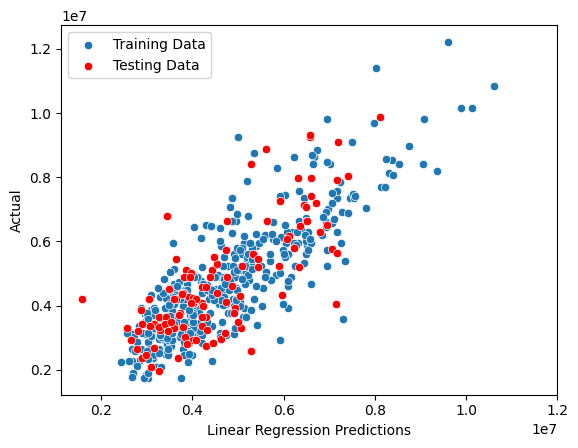

In [54]:
sns.scatterplot(x=y_poly_train_pred, y=y_train)
sns.scatterplot(x=y_poly_test_pred, y=y_test, color='red')
plt.legend(['Training Data', 'Testing Data'])
plt.xticks([2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
plt.xlabel('Linear Regression Predictions')
plt.ylabel('Actual')

# Desicion Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train,y_train)

y_tree_train_pred = tree_model.predict(X_train)
print('Results for Decision Tree on training data')
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_tree_train_pred)))
print('RSE is ', mean_squared_error(y_train, y_tree_train_pred))
print('R^2 ', r2_score(y_train, y_tree_train_pred))

y_tree_test_pred = tree_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_tree_test_pred)))
print('RSE is ', mean_squared_error(y_test, y_tree_test_pred))
print('R^2 ', r2_score(y_test, y_tree_test_pred))

Results for Decision Tree on training data
RMSE is  1013031.5392370755
RSE is  1026232899489.0385
R^2  0.6760671299566425

Results for linear regression on test data
RMSE is  1216762.9722404834
RSE is  1480512130615.495
R^2  0.5328343328925587


Text(0, 0.5, 'Actual')

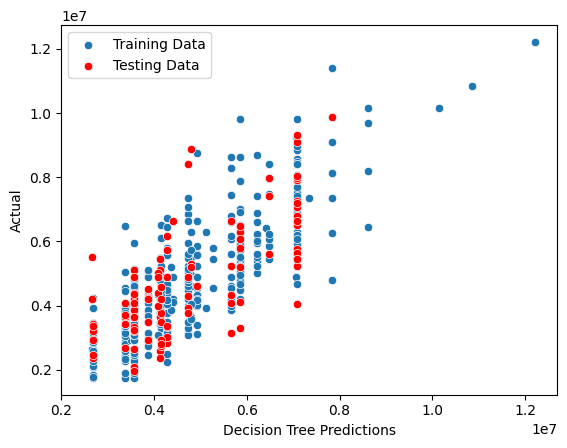

In [70]:
sns.scatterplot(x=y_tree_train_pred, y=y_train)
sns.scatterplot(x=y_tree_test_pred, y=y_test, color='red')
plt.legend(['Training Data', 'Testing Data'])
plt.xticks([2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
plt.xlabel('Decision Tree Predictions')
plt.ylabel('Actual')

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5, random_state=123)
rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)

print('Results for linear regression on train data')
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train, y_train_pred))

y_test_pred = rf_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('RSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test, y_test_pred))

Results for linear regression on train data
RMSE is  912367.1447984057
RSE is  832413806907.595
R^2  0.7372465902530008

Results for linear regression on test data
RMSE is  1159471.75413938
RSE is  1344374748647.0508
R^2  0.5757915701555245


## Results
| Model | Type | RMSE | R^2 |
| --- | --- | --- | --- |
| Linear Reg | Train | 1136595 | 0.5922 |
| Linear Reg | Test | 1227494 | 0.5246 |
| Poly Reg Deg 2 | Train | 1067841 | 0.6401 |
| Poly Reg Deg 2 | Test | 1194405 | 0.5498 |
| Poly Reg Deg 3 | Train | 964012 | 0.7067 |
| Poly Reg Deg 3 | Test | 1309440 | 0.4600 |
| Poly Reg Deg 4 | Train | 952656 |  0.7135 |
| Poly Reg Deg 4 | Test | 1172812 | 0.5660 |
| Descision Tree Depth 3 | Train | 1222539 | 0.5282 |
| Descision Tree Depth 3 | Test | 1256334 | 0.5020 |
| Descision Tree Depth 4 | Train | 1117445 | 0.6058 |
| Descision Tree Depth 4 | Test | 1239294 | 0.5154 |
| Descision Tree Depth 5 | Train | 1013031 | 0.6761 |
| Descision Tree Depth 5 | Test | 1216762 | 0.5328 |
| Random Forest Depth 3 Est 100 | Train | 1139001 | 0.5905 |
| Random Forest Depth 3 Est 100 | Test | 1216965 | 0.5327 |
| Random Forest Depth 4 Est 100 | Train | 1027976 | 0.7372 |
| Random Forest Depth 4 Est 100 | Test | 1172175 | 0.5664 |
| Random Forest Depth 5 Est 100 | Train | 912367 | 0.7372 |
| Random Forest Depth 5 Est 100 | Test | 1159471 | 0.5758 |